# Limpeza e Tratamento de Dados

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
dados = '../data/raw/airbnb-rio.csv'

In [114]:
df = pd.read_csv(dados, sep=',', encoding='utf-8')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2302715,guilherme,11706874,Guilherme,NaN,Anil,-22.95221,-43.32944,Entire home/apt,2700.0,10,0,NaN,NaN,1,365,0,NaN
1,2304688,OLIMPÍADAS 2016,10405816,Eurico,NaN,Ipanema,-22.98767,-43.18991,Entire home/apt,837.0,7,0,NaN,NaN,1,365,0,NaN
2,2306547,Amplo Apto com 3 Dormitórios em Copacabana - 1...,4107346,Vera Lucia,NaN,Copacabana,-22.97333,-43.18857,Entire home/apt,800.0,5,13,2025-03-05,0.21,1,257,3,NaN
3,2306767,Studio in Copacabana Beach,11386725,Carolina,NaN,Copacabana,-22.96477,-43.17605,Entire home/apt,190.0,3,193,2025-03-03,1.44,6,66,19,NaN
4,2308385,Copacabana Ótima opção!,11788583,Ivan,NaN,Copacabana,-22.96820,-43.18523,Entire home/apt,220.0,2,28,2025-03-01,0.21,1,242,4,NaN


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42013 non-null  int64  
 1   name                            42013 non-null  object 
 2   host_id                         42013 non-null  int64  
 3   host_name                       42008 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   42013 non-null  object 
 6   latitude                        42013 non-null  float64
 7   longitude                       42013 non-null  float64
 8   room_type                       42013 non-null  object 
 9   price                           38356 non-null  float64
 10  minimum_nights                  42013 non-null  int64  
 11  number_of_reviews               42013 non-null  int64  
 12  last_review                     

In [116]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group               42013
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              3657
minimum_nights                        0
number_of_reviews                     0
last_review                        8873
reviews_per_month                  8873
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42013
dtype: int64

<Axes: >

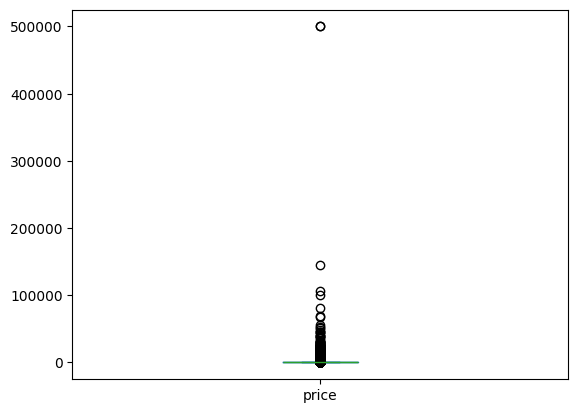

In [117]:
df['price'].plot(kind='box')

In [118]:
df['price'].describe()

count     38356.000000
mean        720.284832
std        4165.194984
min          30.000000
25%         220.000000
50%         343.000000
75%         600.000000
max      500000.000000
Name: price, dtype: float64

In [119]:
df['price'] = df['price'].fillna(df['price'].median())

In [120]:
df['price'].describe()

count     42013.000000
mean        687.444267
std        3981.206307
min          30.000000
25%         229.000000
50%         343.000000
75%         566.000000
max      500000.000000
Name: price, dtype: float64

In [121]:
df['reviews_per_month'].describe()

count    33140.000000
mean         1.263767
std          1.277616
min          0.010000
25%          0.320000
50%          0.930000
75%          1.860000
max         13.650000
Name: reviews_per_month, dtype: float64

In [122]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

In [123]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group               42013
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8873
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42013
dtype: int64

In [124]:
df = df.drop(columns=['neighbourhood_group','license'])
df['host_name'] = df['host_name'].fillna('Nao Informado')

In [125]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8873
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [126]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2302715,guilherme,11706874,Guilherme,Anil,-22.95221,-43.32944,Entire home/apt,2700.0,10,0,NaN,1.263767,1,365,0
1,2304688,OLIMPÍADAS 2016,10405816,Eurico,Ipanema,-22.98767,-43.18991,Entire home/apt,837.0,7,0,NaN,1.263767,1,365,0
2,2306547,Amplo Apto com 3 Dormitórios em Copacabana - 1...,4107346,Vera Lucia,Copacabana,-22.97333,-43.18857,Entire home/apt,800.0,5,13,2025-03-05,0.210000,1,257,3
3,2306767,Studio in Copacabana Beach,11386725,Carolina,Copacabana,-22.96477,-43.17605,Entire home/apt,190.0,3,193,2025-03-03,1.440000,6,66,19
4,2308385,Copacabana Ótima opção!,11788583,Ivan,Copacabana,-22.96820,-43.18523,Entire home/apt,220.0,2,28,2025-03-01,0.210000,1,242,4


In [127]:
contagem_quartos = df['room_type'].value_counts()
contagem_quartos

room_type
Entire home/apt    33581
Private room        8004
Shared room          404
Hotel room            24
Name: count, dtype: int64

Text(0, 0.5, 'Quantidade de imóveis')

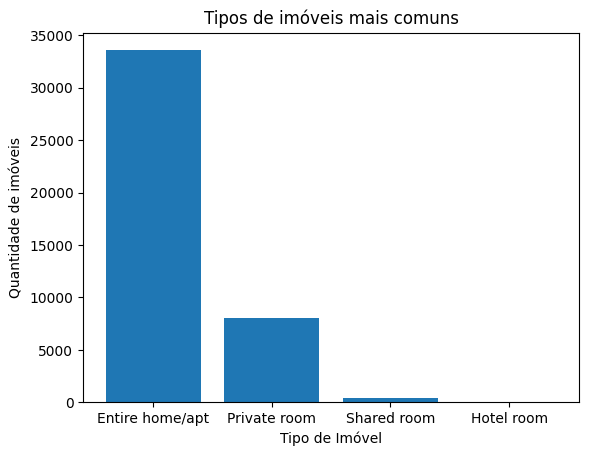

In [128]:
plt.bar(contagem_quartos.index, contagem_quartos.values)
plt.title('Tipos de imóveis mais comuns')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Quantidade de imóveis')

<Figure size 1000x600 with 0 Axes>

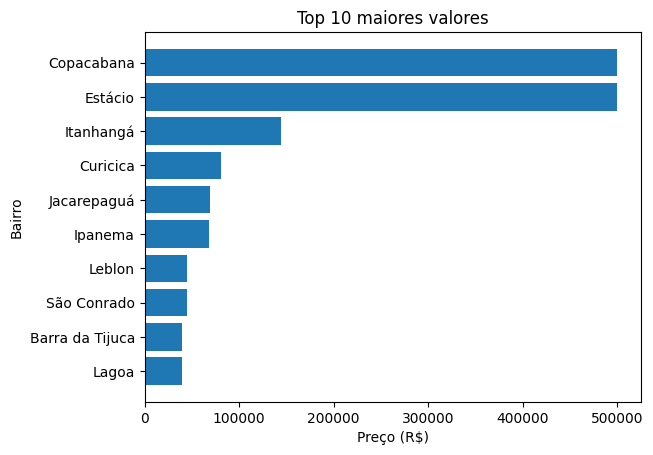

<Figure size 1000x600 with 0 Axes>

In [129]:
MaiorPreco = df.sort_values(by='price', ascending=False).drop_duplicates(subset=['neighbourhood'], keep='first').head(10)
MaiorPreco = MaiorPreco.iloc[::-1]
plt.barh(y=MaiorPreco['neighbourhood'], width=MaiorPreco['price'])
plt.title('Top 10 maiores valores')
plt.ylabel('Bairro')
plt.xlabel('Preço (R$)')
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

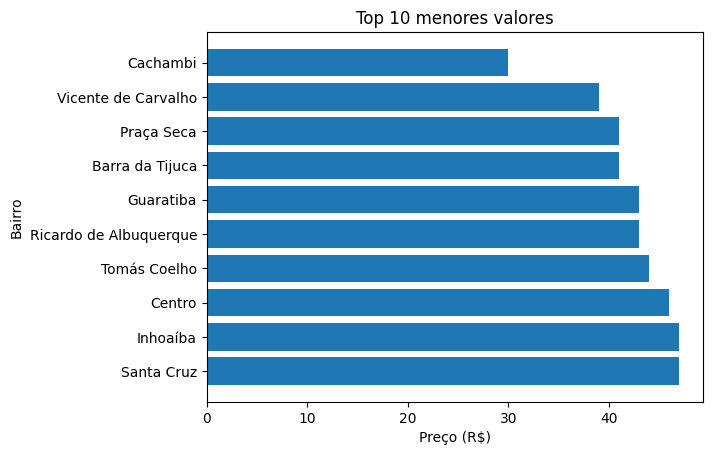

<Figure size 1000x600 with 0 Axes>

In [130]:
MenorPreco = df.sort_values(by='price', ascending=True).drop_duplicates(subset=['neighbourhood']).head(10)
MenorPreco = MenorPreco.iloc[::-1]
plt.barh(y=MenorPreco['neighbourhood'], width=MenorPreco['price'])
plt.title('Top 10 menores valores')
plt.ylabel('Bairro')
plt.xlabel('Preço (R$)')
plt.figure(figsize=(10, 6))

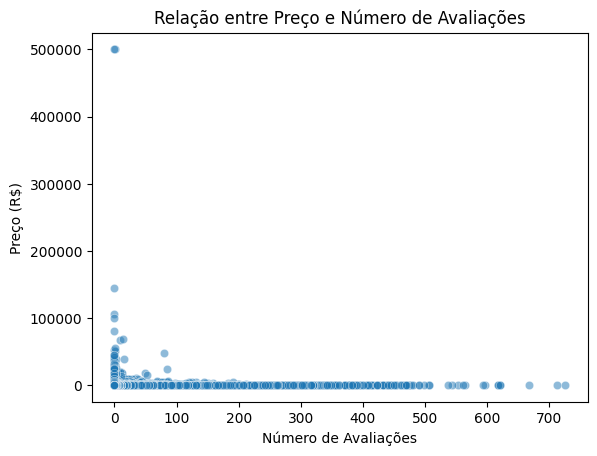

In [131]:
# Gráfico de dispersão
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.5)
plt.title('Relação entre Preço e Número de Avaliações')
plt.xlabel('Número de Avaliações')
plt.ylabel('Preço (R$)')
plt.show()